Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


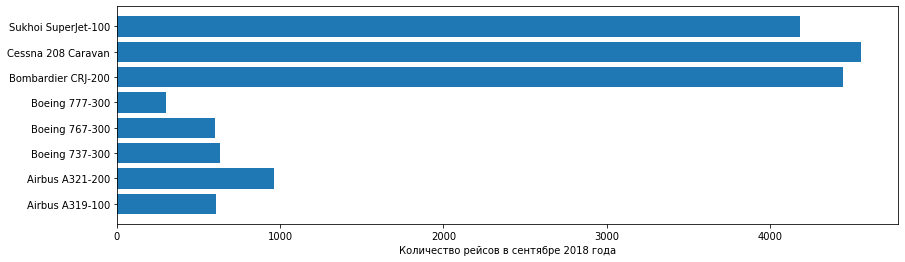

In [5]:
f, ax = plt.subplots(figsize=(14,4))
ax.set_xlabel('Количество рейсов в сентябре 2018 года')
ax.barh(y = query_1['model'],width = query_1['flights_amount']);

Проанализировав график, кол-во полетов можно объяснить следующим образом:
1. Airbus и Boeing относятся больше к международным рейсам, отсюда и небольшое относительно конкурентов кол-во рейсов.
2. Bombardier CRJ и Sukhoi SuperJet - внутренние превозки, самолеты средней вместимости, примерно около 50 человек.
3. Cessna - легкие одномоторные самолеты, преимущественно чатсные. Отсюда и большое количество полетов.

In [6]:
query_3.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Округлим среднее количество полетов до целого, у нас все полеты безопасны.

In [7]:
query_3['average_flights'] = np.floor(query_3['average_flights']).astype(int)

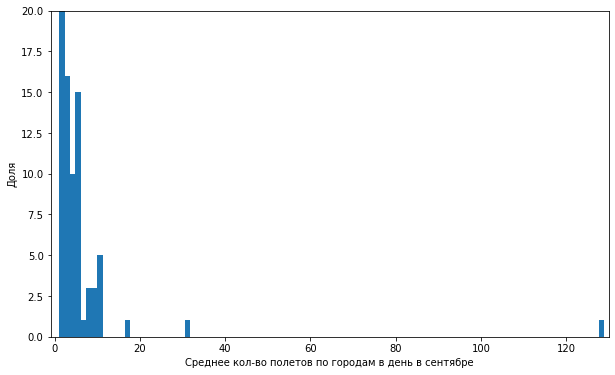

In [8]:
f, ax = plt.subplots(figsize = (10,6))

ax.set_xlim(-1,130)

ax.set_ylim(0,20)

ax.set_xlabel("Среднее кол-во полетов по городам в день в сентябре")

ax.set_ylabel("Доля")

ax.hist(query_3['average_flights'], histtype='stepfilled', bins = 100);

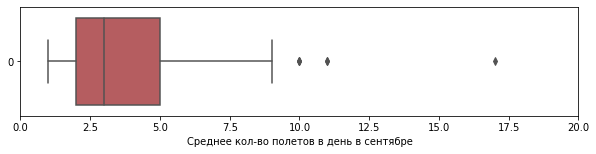

In [9]:
f, ax = plt.subplots(figsize = (10,2))

sns.set(style="whitegrid")

ax.set_xlim(0,20)

ax.set_xlabel("Среднее кол-во полетов в день в сентябре")

sns.boxplot(data = query_3['average_flights'],orient="h", ax = ax, color = 'r');

In [10]:
query_3.describe()

,average_flights
count,101.000000
mean,5.217822
std,13.061090
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,129.000000


Среднее выше медианы засчет крупных городов (в основном Москва, Санкт-Петербург, Новосибирск), где среднее количество полетов выше 10 в день.

In [11]:
query_3[query_3['average_flights'] == 1]['city'].count()

22

В 22 города прибывает в среднем 1 самолет в сутки.

Выберем топ10 городов по среднему количеству полетов в день.

In [12]:
top_cities = query_3.sort_values(by = 'average_flights', ascending = False, axis = 0)[:10]

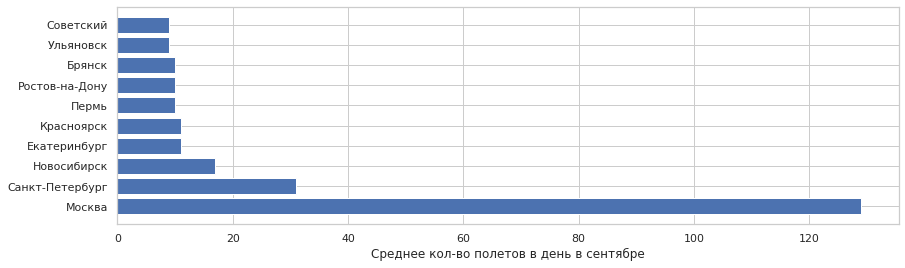

In [13]:
f, ax = plt.subplots(figsize = (14,4))

ax.set_xlabel("Среднее кол-во полетов в день в сентябре")

ax.barh(width = top_cities['average_flights'], y = top_cities['city']);

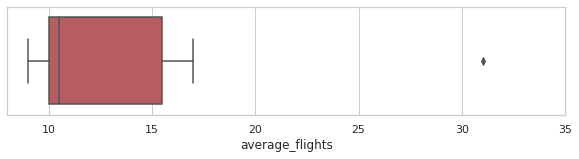

In [14]:
f, ax = plt.subplots(figsize = (10,2))

sns.set(style="whitegrid")

ax.set_xlim(8,35)

ax.set_xlabel("Среднее кол-во полетов в день в сентябре")

sns.boxplot(top_cities['average_flights'],orient="h", ax = ax, color = 'r');

In [15]:
top_cities.describe()

,average_flights
count,10.000000
mean,24.700000
std,37.259003
min,9.000000
25%,10.000000
50%,10.500000
75%,15.500000
max,129.000000


Выделяется столица, остальные города транспортные центры в своих округах. Ульяновск, например — крупный транспортный пункт, лежащий между центральной Россией и Уралом. Советский попал в топ10 из-за частых полетов в северные районы, где нет автомобильного сообщения.

# 2. Проверка гипотезы

In [16]:
query_last = pd.read_csv('/datasets/query_last.csv')

In [17]:
query_last.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [18]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


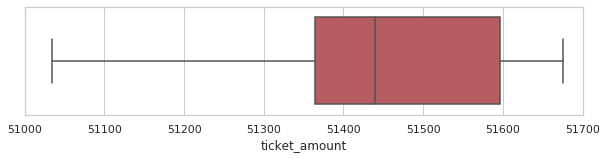

In [19]:
f, ax = plt.subplots(figsize = (10,2))

sns.set(style="whitegrid")

ax.set_xlim(51000,51700)

ax.set_xlabel("Среднее кол-во полетов в день в сентябре")

sns.boxplot(query_last['ticket_amount'],orient="h", ax = ax, color = 'r');

Заполним пропущенные значения в festival_week нулем, в festival_name значением UNK и приведем поле festival_week к типу integer

In [20]:
query_last['festival_week'].fillna(0, inplace = True)
query_last['festival_name'].fillna('UNK', inplace = True)
query_last['festival_week'] = query_last['festival_week'].astype(int)

In [21]:
query_last.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,0,UNK
3,33,51378,0,UNK
4,34,51492,0,UNK
5,35,51360,0,UNK
6,36,51386,36,Видфест
7,37,51670,0,UNK
8,38,51518,0,UNK
9,39,51623,0,UNK


In [46]:
festival_time = query_last[query_last['festival_week'] > 0] \
                ['ticket_amount'].sort_values(ascending=True)
unfestival_time = query_last[query_last['festival_week'] == 0] \
                ['ticket_amount'].sort_values(ascending=True)

In [38]:
np.var(festival_time)

12998464.888888888

In [39]:
np.var(unfestival_time)

14694.408163265307

Дисперсии двух выборок различны, укажем equal_var значение False

In [40]:
alpha = .05

Нулева гипотеза - Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.
Альтернативная - Средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время различны.

Так как данные в двух выборках получены за разное время, то есть, у нас нет данных за один тот же период до и после изменений, выбираем проверку о равенстве средних двух независимых выборок.

In [26]:
results = st.ttest_ind(
festival_time,
unfestival_time, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.377432493172683


In [27]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя среднее количество купленных билетов во время фестивалей и в обычное время неодинаково, с вероятностью в почти 38% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними спросом на авиабилеты во время проведения фестивалей и в обычное время.

### БЫЛО СДЕЛАНО:


1.   Проанализировано кол-во полетов по моделям самолетов в России сентябре 2018 года. Количество полетов здесь можно классифицировать в зависимости от назначения воздушного судна: 

    *   для международных полетов
    *   для внутренних рейсов
    *   частные самолеты 
    

2.   Проанализировано среднее количество полетов в день по городам в сентябре 2018 года - среднее больше медианы за счет больших городов. Выделен топ10, в основном это центральные аэропорты в каждом округе.   


3.   Проверена гипотеза - "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время". У нас не получилось отвергнуть нулевую гипотезу.



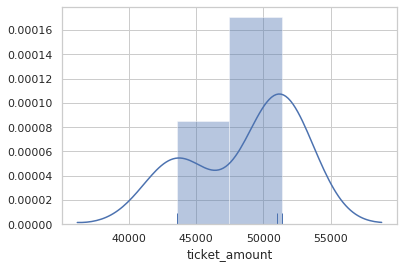

In [33]:
sns.distplot(festival_time, kde = True, rug = True);

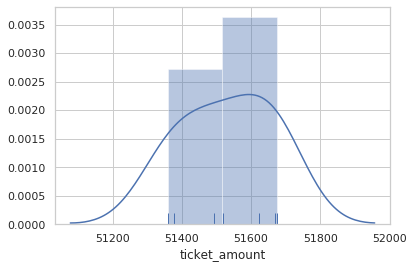

In [34]:
sns.distplot(unfestival_time, kde = True, rug = True);

Согласен, почитав про критерии оценки сдвига понял следующее:
1. Стюдента следует применять, когда мы заранее знаем, что распределение двух выборок имеет нормальную форму. Ранее в проектах, чтобы этого добиться отсеивали выбросы. Это было возможно при достаточном размере выборок (требование размерности относится и к самому критерию).
2. В нашем случае следует пользоваться непараметрическими критериями 
    - Манна — Уитни (в качестве двухвыборочного критерия для независимых выборок)
    - критерий знаков и критерий Уилкоксона (используются в случаях зависимых выборок).
3. Выборки у нас независимы, воспользуемся критерием Манна — Уитни. Его требования:
     - в каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было два значения, но во второй тогда не менее пяти.
     - в выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10).
4. А в документации scipy.org в примечании указано, что им стоит пользоваться, когда число наблюдений в выборках больше 20-ти. Следовательно, не стоит до конца доверять полученной вероятности.

In [41]:
results = st.mannwhitneyu(
festival_time,
unfestival_time, alternative = 'two-sided')
print('p-значение: ', results.pvalue)

p-значение:  0.06824748837800128


In [42]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Не получилось отвергнуть нулевую гипотезу


В итоге можно сказать, что p-value всего в 1% от того, чтобы отвергнуть нулевую гипотезу. Чтобы можно было делать те или иные выводы, наблюдений должно быть больше. Согласен, нужно было глубже изучить вопрос.

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  Проверена гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»
- [x]  Есть пояснение «Как вы формулировали нулевую и альтернативную гипотезы»
- [x]  Есть пояснение «Какой критерий использовали для проверки гипотез и почему»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод